In [8]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
import shap
from numpy import mean
from numpy import std
import sklearn

In [9]:
df = pd.read_csv('clean_data_scaled.csv')
df.head()

,UDI,Type,Air.temperature,Process.temperature,Rotational.speed,Torque,Tool.wear,Machine.failure
0,1,2,-0.952342,-0.947313,0.068182,0.282186,-1.695899,0
1,2,1,-0.902348,-0.879915,-0.729435,0.633276,-1.648769,0
2,3,1,-0.952342,-1.014710,-0.227438,0.944242,-1.617349,0
3,4,1,-0.902348,-0.947313,-0.589992,-0.048843,-1.585930,0
4,5,1,-0.902348,-0.879915,-0.729435,0.001313,-1.554510,0


In [10]:
y = df['HDF']

X = df[['Air_temperature', 'Rotational_speed']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True)

KeyError: 'HDF'

In [ ]:
RFC = RandomForestClassifier(n_estimators=500, random_state=23)
RFC.fit(X_train, y_train.values.ravel())

In [ ]:
y_predict_RFC = RFC.predict(X_test)

#compute accuracy and print it
print("Accuracy:", metrics.accuracy_score(y_test, y_predict_RFC))

In [ ]:
#RFC Confusion Matrix

disp = metrics.plot_confusion_matrix(RFC, X_test, y_test, colorbar=False)

plt.title("Confusion Matrix for RFC")

print(disp.confusion_matrix)

In [ ]:
# model evaluation

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

print(classification_report(y_test, y_predict_RFC))

scores = -cross_val_score(RFC, X, y, scoring='accuracy', cv=cv)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [77]:
# fit the model on the whole dataset
RFC.fit(X, y)

# make a single prediction
row = [[-8.52381793,5.24451077]]
yhat = RFC.predict(row)
print('Predicted Class: %d' % yhat[0])

Accuracy: -0.988 (0.003)
Predicted Class: 0


You are using pip version 19.0, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


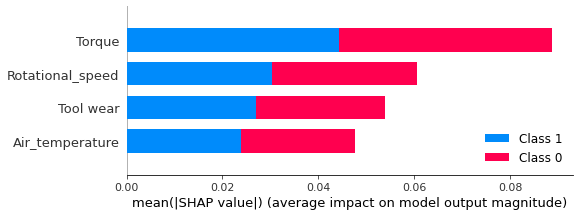

In [87]:
#SHAP Analysis
y = df['Machine failure']

X = df[['Air_temperature', 'Rotational_speed', 'Torque', "Tool wear"]]

clf = RandomForestClassifier(n_estimators=500, random_state=23)
clf.fit(X, y)

explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X[::200])
shap.summary_plot(shap_values, X[::200])

True Class (if 1, Machine Failure, othewise No Machine Failure): 0
Probability that this data point belong to class 0 = 1.00
Base Probability for class 0 = 0.97


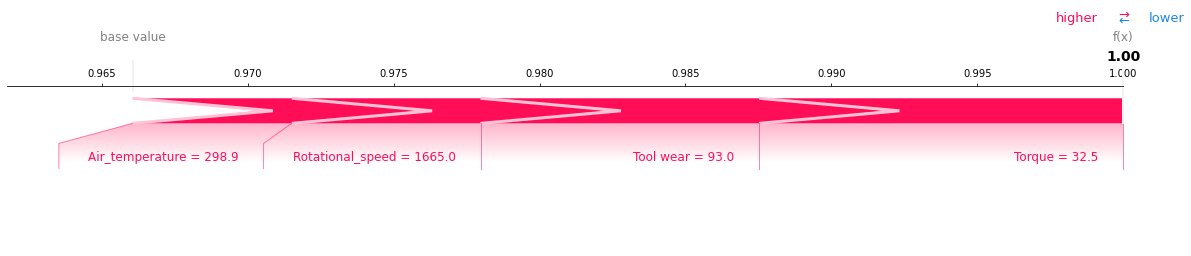

In [84]:
object_i = 33
class_object_i = int(y[::200].iloc[object_i])
print('True Class (if 1, Machine Failure, othewise No Machine Failure):', class_object_i)
print('Probability that this data point belong to class 0 = %0.2f'%(explainer.expected_value[0] + sum(shap_values[0][object_i,:])))
print('Base Probability for class 0 = %0.2f'%(explainer.expected_value[0]))

shap.force_plot(explainer.expected_value[0], 
                shap_values[0][object_i,:], 
                X.iloc[object_i,:], 
                matplotlib=True)